# Make Logbook of Trim images of CTIO Data
==================================================================================================

- author : Sylvie Dagoret-Campagne
- date   : November 15th 2016


In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
from astropy.table import Table, Column
import re
import os

In [127]:
import pandas as pd

In [128]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Location of trim images
----------------------------------

In [129]:
rootpath_rawimage="../../CTIOData2016/August2016/Trim_HD205905"
object_name='HD205905'

In [130]:
filelist_all=os.listdir(rootpath_rawimage) 

In [131]:
logfile='logbk_'+object_name+'.fits'

In [132]:
indexes_files= []
filelist_fitsimages= []
for filename in filelist_all:
    if re.search('^trim_fileno.*fits$',filename):  #example of filename filter
        str_number=re.findall('^trim_fileno([0-9]+).fits$',filename)
        number=int(float(str_number[0]))
        filelist_fitsimages.append(filename)
        indexes_files.append(number)

In [133]:
sorted_indexes=np.argsort(indexes_files) # sort the file indexes

### Short filename sorted

In [134]:
sorted_files= [filelist_fitsimages[index] for index in sorted_indexes] # sort files

### Sorted file numbers

In [135]:
sorted_numbers= [indexes_files[index] for index in sorted_indexes]

#### Sorted fullfilename

In [136]:
sorted_filenames=[]
for file in sorted_files:
    fullfilename=os.path.join(rootpath_rawimage,file)
    indexes_files.append(number)
    sorted_filenames.append(fullfilename)

### Build tables for output file

In [137]:
all_headers = []
all_dates = []
all_airmass = []
all_exposures = []
all_ut = []
all_ra = []
all_dec = []
all_epoch = []
all_zenith = []
all_ha = []
all_st = []
all_alt = []
all_focus = []
all_temp = []
all_press = []
all_hum = []
all_windsp = []
all_seeing = []
all_seeingam = []

for idx,file in np.ndenumerate(sorted_filenames):   
    hdu_list=fits.open(file)
    header=hdu_list[0].header
    date_obs = header['DATE-OBS']
    airmass = float(header['AIRMASS'])
    expo= float(header['EXPTIME'])
    num=sorted_numbers[idx[0]]
    all_dates.append(date_obs)
    all_airmass.append(airmass)
    all_headers.append(header)
    all_exposures.append(expo)
   
    ut=header['UT']
    ra=header['RA']
    dec=header['DEC']
    epoch=float(header['EPOCH'])
    zd = float(header['ZD'])
    ha = header['HA']
    st = header['ST']
    alt = float(header['ALT'])
    fcl = float(header['TELFOCUS'])
    temp= float(header['OUTTEMP'])
    press= float(header['OUTPRESS'])
    hum= float(header['OUTHUM'])
    windsp=float(header['WNDSPEED'])
    seeing=float(header['SEEING'])
    seeingam=float(header['SAIRMASS'])
    
    all_ut.append(ut)
    all_ra.append(ra)
    all_dec.append(dec)
    all_epoch.append(epoch)
    all_zenith.append(zd)
    all_ha.append(ha)
    all_st.append(st)
    all_alt.append(alt)
    all_focus.append(fcl)
    all_temp.append(temp)
    all_press.append(press)
    all_hum.append(hum)
    all_windsp.append(windsp)
    all_seeing.append(seeing)
    all_seeingam.append(seeingam)

    hdu_list.close()
    

## Build outputfile

In [138]:
col_airmass=np.array(all_airmass)
col_number=np.array(sorted_numbers)
col_date=np.array(all_dates)
col_filename=np.array(sorted_files)
col_exposure=np.array(all_exposures)
col_zenith=np.array(all_zenith)
col_altitude=np.array(all_alt)
col_temperature=np.array(all_temp)
col_pressure=np.array(all_press)
col_humidity=np.array(all_hum)
col_windsp=np.array(all_windsp)
col_seeing=np.array(all_seeing)


In [139]:
c1 = fits.Column(name='number', format='J', array=col_number)
c2 = fits.Column(name='airmass', format='E', array=col_airmass)
c3 = fits.Column(name='date', format='A50', array=col_date)
c4 = fits.Column(name='filename', format='A30', array=col_filename)
c5 = fits.Column(name='exposure', format='E', array=col_exposure) 
c6 = fits.Column(name='zenith', format='E', array=col_zenith) 
#c7 = fits.Column(name='altitude', format='E', array=col_altitude) 
c8 = fits.Column(name='temperature', format='E', array=col_temperature) 
c9 = fits.Column(name='pressure', format='E', array=col_pressure) 
c10 = fits.Column(name='humidity', format='E', array=col_humidity) 
c11 = fits.Column(name='windspeed', format='E', array=col_windsp) 
c12 = fits.Column(name='seeing', format='E', array=col_seeing) 


In [140]:
tbhdu = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5,c6,c8,c9,c10,c11,c12])

In [141]:
tbhdu.writeto(logfile,clobber=True)

## Convert into Table
---------------------------

In [142]:
thetable= Table(tbhdu.data)

In [143]:
thetable.show_in_notebook()

number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing
16,1.05,2016-08-23T02:55:43.922,trim_fileno016.fits,20.0,17.825,17.5,778.0,14.0,12.8,1.137
35,1.01,2016-08-23T03:42:22.879,trim_fileno035.fits,20.0,7.914,18.0,778.0,18.0,22.1,1.137
51,1.001,2016-08-23T04:15:21.175,trim_fileno051.fits,20.0,2.951,17.8,778.0,18.0,24.8,1.137
77,1.066,2016-08-23T05:47:35.480,trim_fileno077.fits,20.0,20.362,17.8,778.0,17.0,16.4,1.137
266,1.042,2016-08-24T02:58:21.824,trim_fileno266.fits,20.0,16.404,13.2,778.0,24.0,14.5,1.137
267,1.041,2016-08-24T02:59:25.338,trim_fileno267.fits,20.0,16.176,13.3,778.0,24.0,13.5,1.137
268,1.04,2016-08-24T03:00:28.852,trim_fileno268.fits,20.0,15.948,13.3,778.0,24.0,14.0,1.137
320,1.002,2016-08-24T04:20:49.127,trim_fileno320.fits,20.0,3.548,14.1,778.0,21.0,18.6,1.137
321,1.002,2016-08-24T04:21:52.638,trim_fileno321.fits,20.0,3.683,14.2,778.0,21.0,20.0,1.137
322,1.002,2016-08-24T04:22:56.148,trim_fileno322.fits,20.0,3.826,14.1,778.0,21.0,19.7,1.137


## Read the logfile into a Table
---------------------------------------

In [144]:
t = Table.read(logfile)

In [145]:
t

number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing
int32,float32,str50,str30,float32,float32,float32,float32,float32,float32,float32
16,1.05,2016-08-23T02:55:43.922,trim_fileno016.fits,20.0,17.825,17.5,778.0,14.0,12.8,1.137
35,1.01,2016-08-23T03:42:22.879,trim_fileno035.fits,20.0,7.914,18.0,778.0,18.0,22.1,1.137
51,1.001,2016-08-23T04:15:21.175,trim_fileno051.fits,20.0,2.951,17.8,778.0,18.0,24.8,1.137
77,1.066,2016-08-23T05:47:35.480,trim_fileno077.fits,20.0,20.362,17.8,778.0,17.0,16.4,1.137
266,1.042,2016-08-24T02:58:21.824,trim_fileno266.fits,20.0,16.404,13.2,778.0,24.0,14.5,1.137
267,1.041,2016-08-24T02:59:25.338,trim_fileno267.fits,20.0,16.176,13.3,778.0,24.0,13.5,1.137
268,1.04,2016-08-24T03:00:28.852,trim_fileno268.fits,20.0,15.948,13.3,778.0,24.0,14.0,1.137
320,1.002,2016-08-24T04:20:49.127,trim_fileno320.fits,20.0,3.548,14.1,778.0,21.0,18.6,1.137
321,1.002,2016-08-24T04:21:52.638,trim_fileno321.fits,20.0,3.683,14.2,778.0,21.0,20.0,1.137


## Convert into pandas to plot
---------------------------------------

In [146]:
df = t.to_pandas()

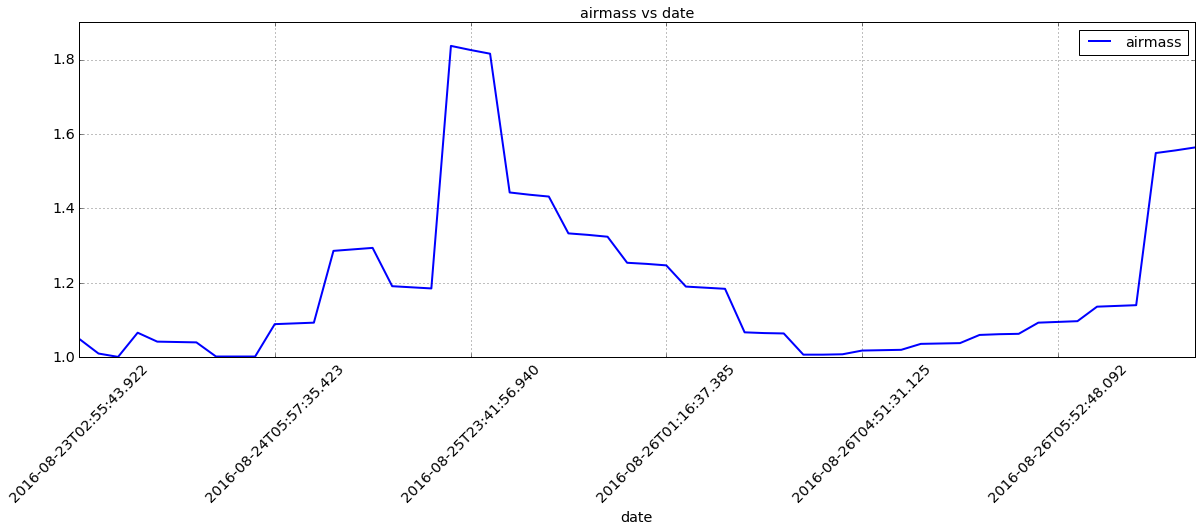

In [147]:
df.plot('date','airmass',figsize=(20,6),rot=45,grid=True,title='airmass vs date',color='b',linewidth=2)
